# 01 - Exploratory Data Analysis (EDA)

**Purpose**: Explore raw data, understand distributions, NANs, etc.

**Outputs**: Insights only (no saved files). Preprocessing happens in notebook 02.

In [2]:
import sys; sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv('../data/raw/IQ_Cancer_Endometrio_merged_NMSP.xlsx')

In [35]:
df[['recidiva', 'recidiva_exitus']].value_counts()

recidiva  recidiva_exitus
0         0                  120
1         1                   29
2         2                    9
0         1                    5
Name: count, dtype: int64

In [57]:
leakage_columns = [
    # leackage
    'recid_super_1',
    'recidiva',
    'fecha_de_recidi',
    'f_muerte',
    'causa_muerte',
    'tto_recidiva',
    'Tt_recidiva_qx',
    'otro_ttIQ_recid',
    'loc_recidiva_r01', 'loc_recidiva_r02', 'loc_recidiva_r03',
    'loc_recidiva_r04', 'loc_recidiva_r05', 'loc_recidiva_r06',
    'numero_de_recid', 'num_recidiva',
    'dx_recidiva',
    'libre_enferm',
    'est_pcte',
    'estado',
    'visita_control',
    'Ultima_fecha',
    'diferencia_dias_reci_exit',
    'despues_diag',

    # soroll
    'codigo_participante',
    'usuario_reg1',
    'f_diag', 'FN', 'fecha_qx', 'f_1v',
    'f_tto_NA',
    'comentarios', 'otras_especifi', 'otra_histo', 'histo_otros',
    'ap_comentarios',
    'inicio_qmt',
    'fecha_final_qmt',
    'tt_o_f_ini',
    'tt_o_f_fin',
    'ini_bqt_rt',
    'final_bqt_rt',
    'ap_gPelv_loc',
    'Tributaria_a_Radioterapia',
    'otros_tt',
    'qt',
    'bqt',
    'moti_no_RT',
    'rdt',
    'estadificacion_',
    'dias_de_ingreso',
    'asa',
    'tiempo_qx',

    # metadata
    'centro_tratPrima',
    'motivonolaparos',
    'trazador_utiliz',
    'tabla_de_estadi',
    'tabla_de_riesgo',

    # compliaciones
    'compl_precoc_r01', 'compl_precoc_r02', 'compl_precoc_r03',
    'compl_precoc_r04', 'compl_precoc_r05', 'compl_precoc_r06',
    'compl_precoc_r07', 'compl_precoc_r08', 'compl_precoc_r09',
    'compl_precoc_r10', 'compl_precoc_r11', 'compl_precoc_r12',
    'compl_precoc_r13', 'compl_precoc_r14',
    'comp_intraop_r01', 'comp_intraop_r02', 'comp_intraop_r03',
    'comp_intraop_r04', 'comp_intraop_r05', 'comp_intraop_r06',
    'comp_intraop_r07', 'otras',
    'comp_claviendin_mes',
    'reintervencion', 'reintervencion_motivo', 'tiempo_transcur',
    'perdida_hematic',
    'perdida_hem_cc',

    #redundante
    'n_resec_Intes',
    'oment_Avan',
    'ciclos_tto_NAdj',
    'transf_GRC', # hasta rriba dicen: uy, mu complicá la operación
    'estudio_genetico_r01',
    'estudio_genetico_r02',
    'estudio_genetico_r03',
    'estudio_genetico_r04',
    'estudio_genetico_r05',
    'estudio_genetico_r06',
    'ultraestidaije_GC',
    'inf_param_vag',
    'dias_de_ingreso',

    #diferenciar grupos
    'p53_molecular',
    'p53_ihq',
    'mut_pole',
    'msh2',
    'msh6',
    'pms2',
    'mlh1',

    #yo que se
    'Reseccion_macroscopica_complet',
    'Tratamiento_RT',
    'Tratamiento_sistemico',
    'presntado_cTG',
]

prefixos_excloure = ['tec_', 'gc_', 'Motivo_de_conversion_']
columnes_finals = [
    col for col in df.columns 
    if col not in leakage_columns 
    and not any(col.startswith(prefix) for prefix in prefixos_excloure)
]

print(f"Columnes originals: {len(df.columns)}")
print(f"Columnes eliminades (leakage/soroll): {len(df.columns) - len(columnes_finals)}")
print(f"Columnes finals: {len(columnes_finals)}")

df_clean = df[columnes_finals].copy()

df_clean = df_clean[df_clean['recidiva_exitus'].notna()]
df_clean = df_clean[df_clean['recidiva_exitus'] != 2] # habia 9

print(f"\n✅ DataFrame net: {df_clean.shape[0]} files x {df_clean.shape[1]} columnes")
print(f"\nColumnes finals:\n{list(df_clean.columns)}")

Columnes originals: 189
Columnes eliminades (leakage/soroll): 133
Columnes finals: 56

✅ DataFrame net: 154 files x 56 columnes

Columnes finals:
['recidiva_exitus', 'edad', 'imc', 'tipo_histologico', 'Grado', 'valor_de_ca125', 'ecotv_infiltsub', 'ecotv_infiltobj', 'metasta_distan', 'grupo_riesgo', 'estadiaje_pre_i', 'hsp_trat_primario', 'tto_NA', 'tto_1_quirugico', 'inten_tto', 'abordajeqx', 'conver_laparo', 'Tec_histerec', 'Anexectomia', 'omentectomia', 'Perforacion_uterina', 'Movilizador_uterino', 'tc_gc', 'histe_avanz', 'histo_defin', 'grado_histologi', 'tamano_tumoral', 'infilt_estr_cervix', 'infiltracion_mi', 'tx_anexial', 'tx_sincronico', 'afectacion_linf', 'afectacion_omen', 'AP_centinela_pelvico', 'n_total_GC', 'n_GC_Afect', 'AP_ganPelv', 'n_total_ganCent', 'n_gangP_afec', 'AP_glanPaor', 'Local_Gan_Paor', 'n_total_ganPaor_infra', 'n_ganPaor_InfrM_afec', 'n_total_ganPaor_supr', 'n_ganPaor_Sup_afec', 'ap_gPaor_total', 'ap_gPor_afect_tot', 'recep_est_porcent', 'rece_de_Ppor', 'be

In [59]:
na_percent = (df_clean.isna().sum() / len(df_clean) * 100)
cols_50_plus = na_percent[na_percent >= 50].index.tolist()
print(f"Columnes amb ≥50% NAs: {len(cols_50_plus)}\n")
for col in cols_50_plus:
    print(col)

Columnes amb ≥50% NAs: 9

valor_de_ca125
histe_avanz
AP_ganPelv
AP_glanPaor
Local_Gan_Paor
rt_dosis
n_doisis_rt
bt_realPac
Tratamiento_sistemico_realizad


In [58]:
print(f"Total columnes: {len(df_clean.columns)}\n")
for i, col in enumerate(df_clean.columns):
    print(f"{i+1}. {col}")

Total columnes: 56

1. recidiva_exitus
2. edad
3. imc
4. tipo_histologico
5. Grado
6. valor_de_ca125
7. ecotv_infiltsub
8. ecotv_infiltobj
9. metasta_distan
10. grupo_riesgo
11. estadiaje_pre_i
12. hsp_trat_primario
13. tto_NA
14. tto_1_quirugico
15. inten_tto
16. abordajeqx
17. conver_laparo
18. Tec_histerec
19. Anexectomia
20. omentectomia
21. Perforacion_uterina
22. Movilizador_uterino
23. tc_gc
24. histe_avanz
25. histo_defin
26. grado_histologi
27. tamano_tumoral
28. infilt_estr_cervix
29. infiltracion_mi
30. tx_anexial
31. tx_sincronico
32. afectacion_linf
33. afectacion_omen
34. AP_centinela_pelvico
35. n_total_GC
36. n_GC_Afect
37. AP_ganPelv
38. n_total_ganCent
39. n_gangP_afec
40. AP_glanPaor
41. Local_Gan_Paor
42. n_total_ganPaor_infra
43. n_ganPaor_InfrM_afec
44. n_total_ganPaor_supr
45. n_ganPaor_Sup_afec
46. ap_gPaor_total
47. ap_gPor_afect_tot
48. recep_est_porcent
49. rece_de_Ppor
50. beta_cateninap
51. FIGO2023
52. grupo_de_riesgo_definitivo
53. rt_dosis
54. n_doisis_r

# ordinal cat
Tratamiento_sistemico_realizad
rt_dosis
grupo_de_riesgo_definitivo
FIGO2023
AP_glanPaor
Local_Gan_Paor
infiltracion_mi
grado_histologi


# binaria
bt_realPac
afectacion_omen
afectacion_linf
tx_anexial
tx_sincronico
infilt_estr_cervix

# categorica no ordinal mal
histo_defin

si ap_gPor_afect_tot > 1 estas fuerisima (1 en decidiva_exitus)

In [ ]:
columnes_excloure_pca = [

]

df_pca = df_clean.drop(columns=[col for col in columnes_excloure_pca if col in df_clean.columns])
df_pca_numeric = df_pca.select_dtypes(include=[np.number])

print(f"Columnes originals df_clean: {len(df_clean.columns)}")
print(f"Columnes per PCA: {len(df_pca_numeric.columns)}")
print(f"\nColumnes seleccionades per PCA:")
for i, col in enumerate(df_pca_numeric.columns):
    na_pct = df_pca_numeric[col].isna().sum() / len(df_pca_numeric) * 100
    print(f"{i+1}. {col} ({na_pct:.1f}% NA)")

In [8]:
"""
df_numeric = df_filtered.select_dtypes(include=[np.number])
columnas_num = [col for col in df_numeric.columns if col != 'recidiva']

print(f"Total variables numéricas: {len(columnas_num)}")

# Dividir en bloques de 5
bloque_size = 5
bloques = [columnas_num[i:i+bloque_size] for i in range(0, len(columnas_num), bloque_size)]

print(f"Se generarán {len(bloques)} gráficos")

# Crear un pairplot por cada bloque
for i, bloque in enumerate(bloques):
    print(f"\n{'='*50}")
    print(f"Bloque {i+1}: {bloque}")
    print(f"{'='*50}")
    
    # Añadir 'recidiva' al bloque para usarlo como hue
    cols_plot = bloque + ['recidiva']
    df_plot = df_filtered[cols_plot].dropna()
    
    print(f"Registros sin NA: {len(df_plot)}")
    
    if len(df_plot) > 0:
        g = sns.pairplot(df_plot, hue='recidiva', 
                        corner=True, 
                        diag_kind='kde',
                        palette='coolwarm',
                        plot_kws={'alpha': 0.6, 's': 25})
        g.fig.suptitle(f'Bloque {i+1} - Variables vs Recidiva', y=1.02, fontsize=14)
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ No hay datos suficientes después de eliminar NA")
"""

'\ndf_numeric = df_filtered.select_dtypes(include=[np.number])\ncolumnas_num = [col for col in df_numeric.columns if col != \'recidiva\']\n\nprint(f"Total variables numéricas: {len(columnas_num)}")\n\n# Dividir en bloques de 5\nbloque_size = 5\nbloques = [columnas_num[i:i+bloque_size] for i in range(0, len(columnas_num), bloque_size)]\n\nprint(f"Se generarán {len(bloques)} gráficos")\n\n# Crear un pairplot por cada bloque\nfor i, bloque in enumerate(bloques):\n    print(f"\n{\'=\'*50}")\n    print(f"Bloque {i+1}: {bloque}")\n    print(f"{\'=\'*50}")\n\n    # Añadir \'recidiva\' al bloque para usarlo como hue\n    cols_plot = bloque + [\'recidiva\']\n    df_plot = df_filtered[cols_plot].dropna()\n\n    print(f"Registros sin NA: {len(df_plot)}")\n\n    if len(df_plot) > 0:\n        g = sns.pairplot(df_plot, hue=\'recidiva\', \n                        corner=True, \n                        diag_kind=\'kde\',\n                        palette=\'coolwarm\',\n                        plot_kws=

Columnes numèriques: 91
Mostres totals: 154
NAs totals: 3698
Mostres després imputació: 154


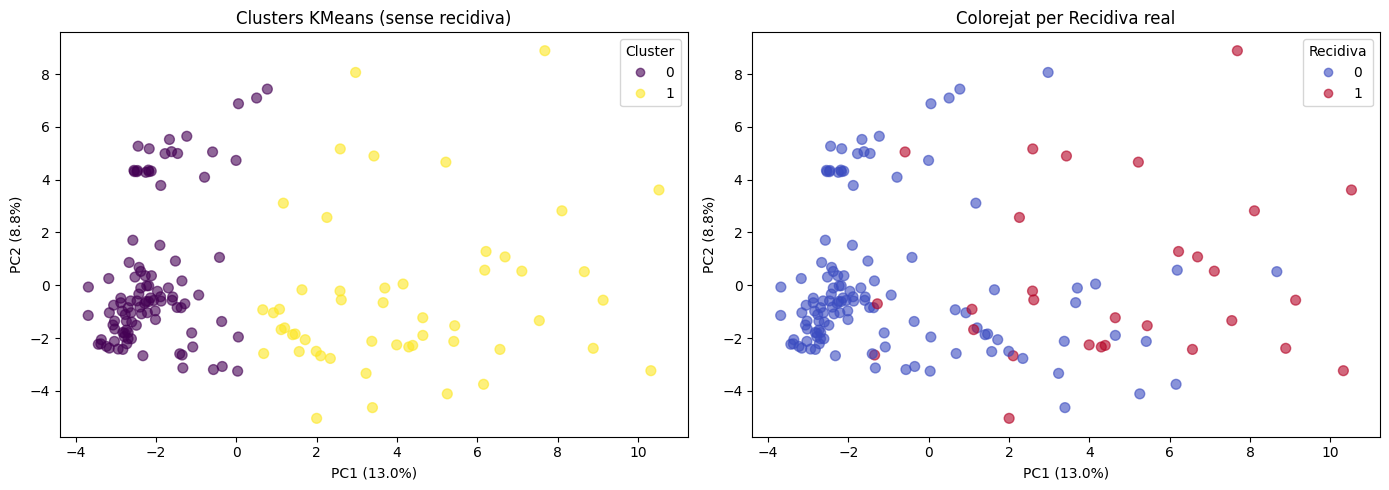


📊 Taula de contingència: Cluster vs Recidiva
Recidiva    0   1
Cluster          
0         100   3
1          25  26


In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Separar features i target
X = df_clean.drop(columns=['recidiva'])
y = df_clean['recidiva']

# Només columnes numèriques pel clustering
X_numeric = X.select_dtypes(include=[np.number])

print(f"Columnes numèriques: {X_numeric.shape[1]}")
print(f"Mostres totals: {X_numeric.shape[0]}")
print(f"NAs totals: {X_numeric.isna().sum().sum()}")

# Imputar NAs amb la mediana
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_numeric)

print(f"Mostres després imputació: {X_imputed.shape[0]}")

# Escalar dades
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Clustering amb KMeans (2 clusters per comparar amb recidiva)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Reduir dimensionalitat amb PCA per visualitzar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear figura amb 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Clusters de KMeans
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6, s=50)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[0].set_title('Clusters KMeans (sense recidiva)')
axes[0].legend(*scatter1.legend_elements(), title='Cluster')

# Plot 2: Colorejat per Recidiva real
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6, s=50)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[1].set_title('Colorejat per Recidiva real')
axes[1].legend(*scatter2.legend_elements(), title='Recidiva')

plt.tight_layout()
plt.show()

# Comparar clusters vs recidiva
print("\n📊 Taula de contingència: Cluster vs Recidiva")
print(pd.crosstab(clusters, y, rownames=['Cluster'], colnames=['Recidiva']))

PC1: 12.96% (acumulat: 12.96%)
PC2: 8.79% (acumulat: 21.75%)
PC3: 5.14% (acumulat: 26.89%)
PC4: 4.24% (acumulat: 31.13%)
PC5: 3.68% (acumulat: 34.81%)
PC6: 3.57% (acumulat: 38.38%)
PC7: 3.18% (acumulat: 41.56%)
PC8: 2.85% (acumulat: 44.41%)
PC9: 2.67% (acumulat: 47.08%)
PC10: 2.50% (acumulat: 49.58%)


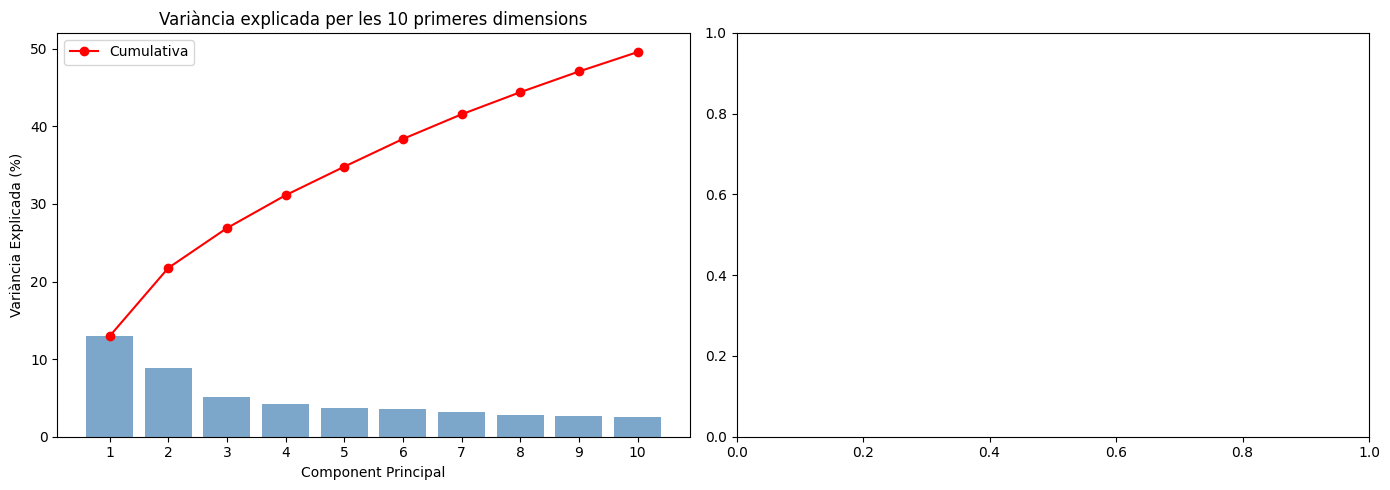

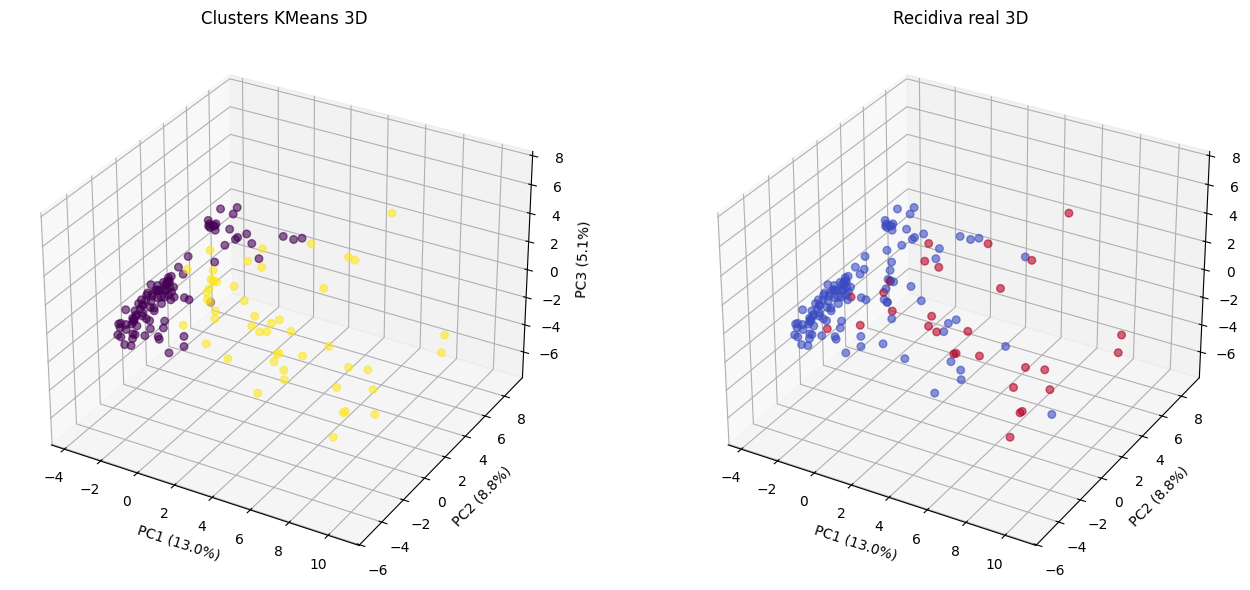


📊 Variància total explicada amb 3 components: 26.9%


In [26]:
from mpl_toolkits.mplot3d import Axes3D

# PCA amb 10 components per veure variabilitat
pca_10 = PCA(n_components=10)
pca_10.fit(X_scaled)

# Gràfic de variància explicada
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Variància per component
axes[0].bar(range(1, 11), pca_10.explained_variance_ratio_ * 100, alpha=0.7, color='steelblue')
axes[0].plot(range(1, 11), np.cumsum(pca_10.explained_variance_ratio_) * 100, 'ro-', label='Cumulativa')
axes[0].set_xlabel('Component Principal')
axes[0].set_ylabel('Variància Explicada (%)')
axes[0].set_title('Variància explicada per les 10 primeres dimensions')
axes[0].legend()
axes[0].set_xticks(range(1, 11))

# Taula de variància
for i, (var, cum) in enumerate(zip(pca_10.explained_variance_ratio_, np.cumsum(pca_10.explained_variance_ratio_))):
    print(f"PC{i+1}: {var*100:.2f}% (acumulat: {cum*100:.2f}%)")

plt.tight_layout()
plt.show()

# ============ PLOT 3D ============
# PCA amb 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(14, 6))

# Plot 3D - Clusters
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                       c=clusters, cmap='viridis', alpha=0.6, s=30)
ax1.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)')
ax1.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)')
ax1.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)')
ax1.set_title('Clusters KMeans 3D')

# Plot 3D - Recidiva
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                       c=y, cmap='coolwarm', alpha=0.6, s=30)
ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)')
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)')
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)')
ax2.set_title('Recidiva real 3D')

plt.tight_layout()
plt.show()

print(f"\n📊 Variància total explicada amb 3 components: {sum(pca_3d.explained_variance_ratio_)*100:.1f}%")

## Next Step
→ Go to `02_data_preprocessing.ipynb`

In [ ]:
# Crear nova variable: dosi per sessió
df_clean['dosis_per_sesion'] = df_clean['rt_dosis'] / df_clean['n_doisis_rt']

# Verificar
print(df_clean[['rt_dosis', 'n_doisis_rt', 'dosis_per_sesion']].head(10))
print(f"\nEstadístiques:")
print(df_clean['dosis_per_sesion'].describe())